In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.layers import Dense, Input, LSTM, SimpleRNN, GRU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# Creating data

series = np.sin((0.1*np.arange(400))**2)

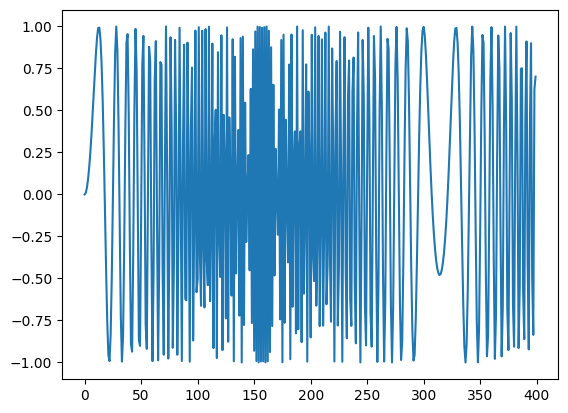

In [3]:
# Plotting 
plt.plot(series)
plt.show()

# We can see that at the data is not consistent,it becomes sparse at scertain points

In [4]:
# Building the dataset
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:T+t]
  X.append(x)

  y = series[t+T]
  Y.append(y)

N = len(X)

X = np.array(X)
Y = np.array(Y)

print("shape of X: " + str(X.shape))
print("shape of y: " + str(Y.shape))

# Our X data is N x T shaped as default.So we don't have to apply reshape function


shape of X: (390, 10)
shape of y: (390,)


In [5]:
# For comparison, first let's build the "Autoregressive Linear Model"  
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i, x)

model.compile(
    loss="mse",
    optimizer = Adam(learning_rate=0.01),

)

r = model.fit(X[:-N//2],Y[:-N//2],
              validation_data=(X[-N//2:],Y[-N//2:]),
              epochs=80)


Epoch 1/80
7/7 [==============================] - 3s 84ms/step - loss: 1.4654 - val_loss: 0.6641
Epoch 2/80
7/7 [==============================] - 0s 22ms/step - loss: 1.2690 - val_loss: 0.6087
Epoch 3/80
7/7 [==============================] - 0s 20ms/step - loss: 1.1256 - val_loss: 0.5682
Epoch 4/80
7/7 [==============================] - 0s 20ms/step - loss: 1.0106 - val_loss: 0.5383
Epoch 5/80
7/7 [==============================] - 0s 18ms/step - loss: 0.9041 - val_loss: 0.5112
Epoch 6/80
7/7 [==============================] - 0s 14ms/step - loss: 0.8233 - val_loss: 0.4912
Epoch 7/80
7/7 [==============================] - 0s 27ms/step - loss: 0.7551 - val_loss: 0.4786
Epoch 8/80
7/7 [==============================] - 0s 23ms/step - loss: 0.7050 - val_loss: 0.4732
Epoch 9/80
7/7 [==============================] - 0s 14ms/step - loss: 0.6582 - val_loss: 0.4700
Epoch 10/80
7/7 [==============================] - 0s 21ms/step - loss: 0.6199 - val_loss: 0.4696
Epoch 11/80
7/7 [============

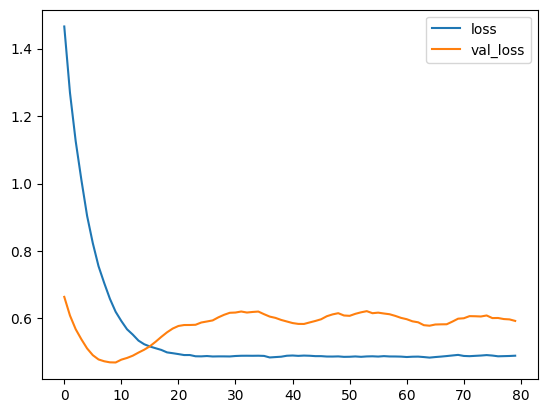

In [6]:
# Plotting loss per iteration
plt.plot(r.history["loss"],label="loss") # For train
plt.plot(r.history["val_loss"],label="val_loss") # For test
plt.legend()
plt.show()

In [7]:
print(X.shape)

(390, 10)


In [8]:
# ONE STEP FORECAST (Wrong way of forecasting)
outputs = model.predict(X)
print("Output shape =" + str(outputs.shape))

13/13 [==============================] - 0s 2ms/step
Output shape =(390, 1)


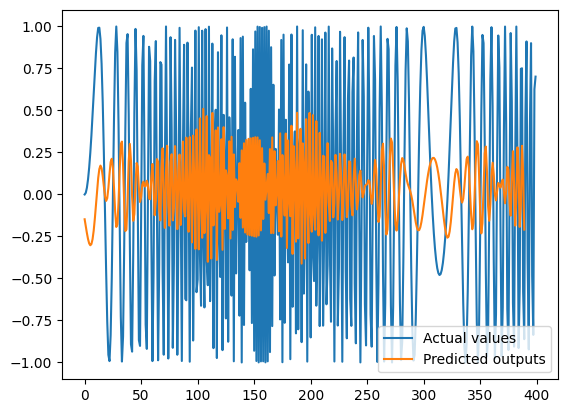

In [9]:
plt.plot(series,label="Actual values")
plt.plot(outputs,label="Predicted outputs")
plt.legend()
plt.show()

In [10]:
# It doesn't perform well, it just understands the pattern,

In [11]:
#Let's try Multistep Forecasst

validation_set=X[-N//2:]

last_x = X[-N//2]

predicted_values=[]

while len(predicted_values) < len(validation_set):
  p = model.predict(last_x.reshape(1,-1))[0, 0]  # Our input for the prediction must be (D x T) which is (1 x 10)
  predicted_values.append(p)
  
  last_x = np.roll(last_x,-1)
  last_x[-1] = p
  

print(len(predicted_values)) 

1/1 [==============================] - 0s 37ms/step
195


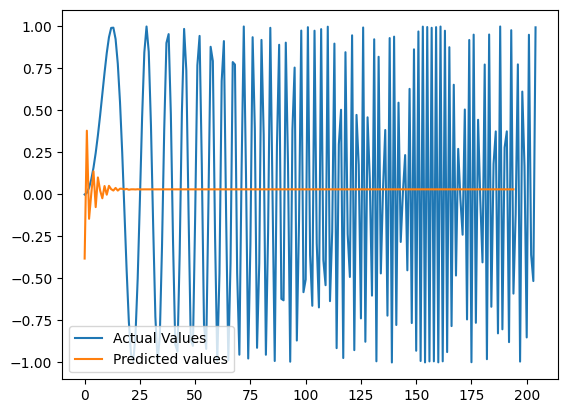

In [12]:
predicted_values = np.array(predicted_values).flatten()

plt.plot(series[:-N//2],label="Actual Values")
plt.plot(predicted_values,label="Predicted values")
plt.legend()
plt.show()

In [13]:
# So we can deduce that Multistep forecast is not an effective way either
# SO IT'S OBVIOUS THAT LINEAR MODOEL IS NOT GOOD AT FORECASTING ON THESE KIND OF LONG DATASETS DUE TO THE VANISHING GRADIENT PROBLEM

In [14]:
# Now let's try simple RNN

# Simple RNN

In [15]:
X = X.reshape(-1, T, D)
X = X.reshape(N,T,D) # We turned it into N x T x D

i = Input(shape=(T,D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)

model= Model(i ,x)

model.compile(loss="mse",
              optimizer= Adam(learning_rate=0.05))


In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Epoch 1/80
7/7 [==============================] - 1s 53ms/step - loss: 0.5555 - val_loss: 0.7433
Epoch 2/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5184 - val_loss: 0.5353
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5371 - val_loss: 0.5654
Epoch 4/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5387 - val_loss: 0.6317
Epoch 5/80
7/7 [==============================] - 0s 9ms/step - loss: 0.4977 - val_loss: 0.6814
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.5155 - val_loss: 0.6069
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5071 - val_loss: 0.5757
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.4930 - val_loss: 0.5361
Epoch 9/80
7/7 [==============================] - 0s 10ms/step - loss: 0.5142 - val_loss: 0.4915
Epoch 10/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5398 - val_loss: 0.4590
Epoch 11/80
7/7 [================

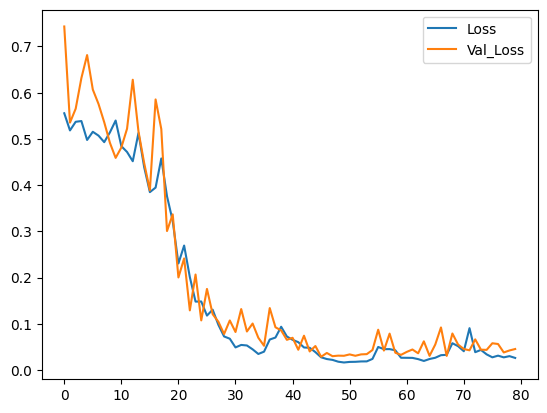

In [17]:

r=model.fit(X[:-N//2],Y[:-N//2],
            validation_data=(X[-N//2:],Y[-N//2:]),
            epochs=80,
            batch_size=32)

plt.plot(r.history["loss"],label="Loss")
plt.plot(r.history["val_loss"],label="Val_Loss")
plt.legend()
plt.show()

# RNN-One step forecast

13/13 [==============================] - 0s 2ms/step


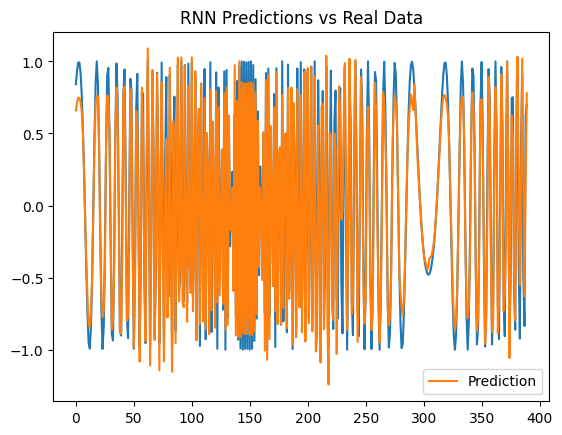

In [18]:
# As we can see RNN works more efficient than others
# Let's see on the data with ONE STEP FORECAST



outputs = model.predict(X)

predictions = outputs[:,0]

plt.plot(Y)
plt.plot(predictions,label="Prediction")
plt.title("RNN Predictions vs Real Data")
plt.legend()
plt.show()

# It's really efficient comparing Autoregressive model

# RNN Multi step forecast

In [19]:

# Building the dataset AGAIN to avert confusion
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:T+t]
  X.append(x)

  y = series[t+T]
  Y.append(y)

N = len(X)

X = np.array(X)
Y = np.array(Y)

X = X.reshape(N,T,D)

predicted_values=[]
last_x = X[-N//2]

while len(predicted_values) < len(Y[-N//2:]):
  p = model.predict(last_x.reshape(1,T,1))[0, 0], # Since RNN takes N x T x D input and 1 element is (1x10x1)
  predicted_values.append(p)

  last_x = np.roll(last_x,-1)
  last_x[-1] = p





1/1 [==============================] - 0s 24ms/step


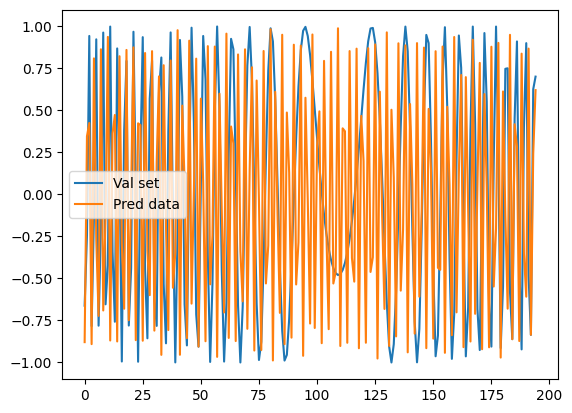

In [20]:
plt.plot(Y[N//2:],label="Val set")
plt.plot(predicted_values,label="Pred data")
plt.legend()
plt.show()

In [21]:
# It doenst work well but at least gets the pattern and does better job than Linear model

# NOW IT'S TIME TO USE LSTM



#LSTM

In [22]:
X = X.reshape(-1, T, D)
 # We turned it into N x T x D

i = Input(shape=(T,D))
x = LSTM(10)(i)
x = Dense(1)(x)

model= Model(i ,x)

model.compile(loss="mse",
              optimizer= Adam(learning_rate=0.05))


In [23]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
7/7 [==============================] - 3s 95ms/step - loss: 0.5442 - val_loss: 0.5366
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5076 - val_loss: 0.5869
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4588 - val_loss: 0.5009
Epoch 4/200
7/7 [==============================] - 0s 13ms/step - loss: 0.3987 - val_loss: 0.5608
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3283 - val_loss: 0.3619
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2069 - val_loss: 0.2728
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1356 - val_loss: 0.2091
Epoch 8/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1035 - val_loss: 0.1415
Epoch 9/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0753 - val_loss: 0.1658
Epoch 10/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0617 - val_loss: 0.1161
Epoch 11/200
7/7 [=

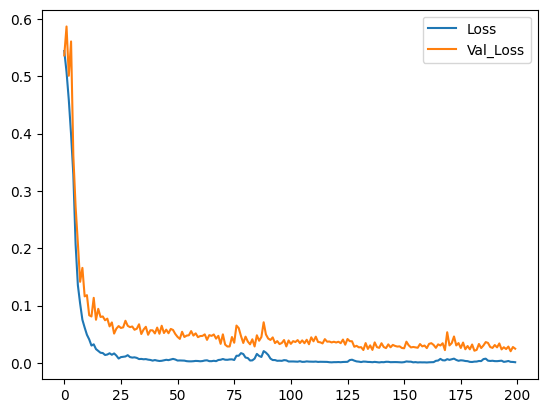

In [24]:

r=model.fit(X[:-N//2],Y[:-N//2],
            validation_data=(X[-N//2:],Y[-N//2:]),
            epochs=200,
            batch_size=32)

plt.plot(r.history["loss"],label="Loss")
plt.plot(r.history["val_loss"],label="Val_Loss")
plt.legend()
plt.show()

# LSTM - One step forecast

13/13 [==============================] - 0s 2ms/step


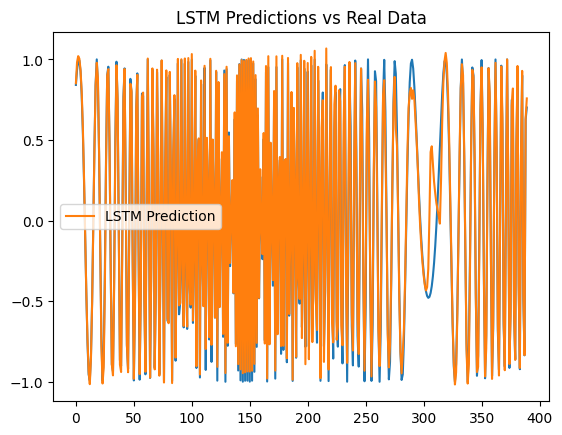

In [25]:
# As we can see LSTM works more efficient than others
# Let's see on the data with ONE STEP FORECAST


outputs = model.predict(X)

predictions = outputs[:,0]

plt.plot(Y)
plt.plot(predictions,label="LSTM Prediction")
plt.title("LSTM Predictions vs Real Data")
plt.legend()
plt.show()

# It's really efficient comparing Autoregressive model

# LSTM - Multistep Forecast

In [26]:

# Building the dataset AGAIN to avert confusion
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:T+t]
  X.append(x)

  y = series[t+T]
  Y.append(y)

N = len(X)

X = np.array(X)
Y = np.array(Y)

X = X.reshape(N,T,D)

predicted_values=[]
last_x = X[-N//2]

while len(predicted_values) < len(Y[-N//2:]):
  p = model.predict(last_x.reshape(1,T,1))[0, 0], # Since RNN takes N x T x D input and 1 element is (1x10x1)
  predicted_values.append(p)

  last_x = np.roll(last_x,-1)
  last_x[-1] = p





1/1 [==============================] - 0s 21ms/step


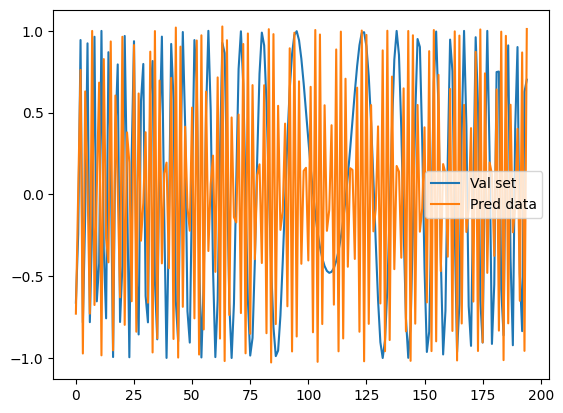

In [27]:
plt.plot(Y[N//2:],label="Val set")
plt.plot(predicted_values,label="Pred data")
plt.legend()
plt.show()